In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataframe
df = pd.read_csv("bgg_top5000.csv")
df

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic
0,224517,Brass: Birmingham,2018,1,8.41611,8.59849,45505,3.8809,2,4,60,120,14,"['Age of Reason', 'Economic', 'Industry / Manu...","['Hand Management', 'Income', 'Loans', 'Market..."
1,161936,Pandemic Legacy: Season 1,2015,2,8.38079,8.52838,53369,2.8315,2,4,60,60,13,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,174430,Gloomhaven,2017,3,8.35418,8.59040,62022,3.9112,1,4,60,120,14,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign..."
3,342942,Ark Nova,2021,4,8.33397,8.53500,43007,3.7593,1,4,90,150,14,"['Animals', 'Economic', 'Environmental']","['Action Queue', 'End Game Bonuses', 'Hand Man..."
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24169,8.60196,23644,4.3152,3,6,240,480,14,"['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area-Impulse', 'Dice Roll..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,249582,The Dark Summer: Normandy 1944,2021,4996,5.74559,7.88088,273,2.8667,1,2,480,480,0,"['Wargame', 'World War II']","['Chit-Pull System', 'Dice Rolling']"
4996,963,The Gardens of the Alhambra,1993,4997,5.74555,6.15148,1370,1.7913,2,4,45,60,8,['Abstract Strategy'],"['Area Majority / Influence', 'Tile Placement']"
4997,72644,Perplexus,2001,4998,5.74546,6.94747,442,1.5000,1,1,30,30,6,"['Action / Dexterity', 'Maze']",[]
4998,97273,Upon a Salty Ocean,2011,4999,5.74544,6.47869,712,2.8971,2,4,120,120,13,"['Economic', 'Nautical', 'Renaissance']","['Action Points', 'Variable Phase Order']"


In [3]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5000 non-null   int64  
 1   name           5000 non-null   object 
 2   yearpublished  5000 non-null   int64  
 3   rank           5000 non-null   int64  
 4   bayesaverage   5000 non-null   float64
 5   average        5000 non-null   float64
 6   usersrated     5000 non-null   int64  
 7   weight         5000 non-null   float64
 8   minplayers     5000 non-null   int64  
 9   maxplayers     5000 non-null   int64  
 10  minplaytime    5000 non-null   int64  
 11  maxplaytime    5000 non-null   int64  
 12  age            5000 non-null   int64  
 13  category       5000 non-null   object 
 14  mechanic       5000 non-null   object 
dtypes: float64(3), int64(9), object(3)
memory usage: 586.1+ KB


In [4]:
# Making sure there are no NaNs
np.sum(df.isna())

id               0
name             0
yearpublished    0
rank             0
bayesaverage     0
average          0
usersrated       0
weight           0
minplayers       0
maxplayers       0
minplaytime      0
maxplaytime      0
age              0
category         0
mechanic         0
dtype: int64

In [5]:
# Making sure there are no duplicate rows
np.sum(df.duplicated())

0

<Axes: xlabel='yearpublished', ylabel='weight'>

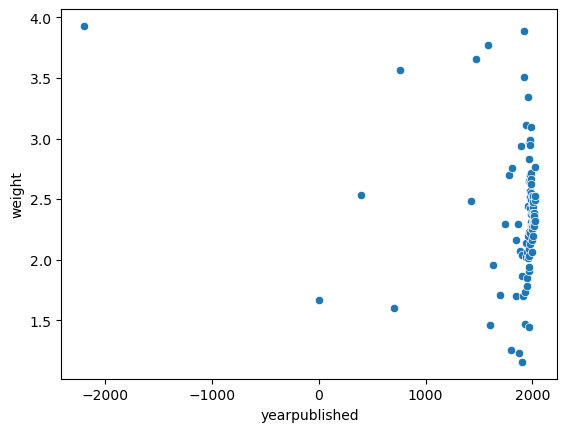

In [6]:
# Checking if there is a correlation between the year published and boardgame weight
sns.scatterplot(df.groupby(df['yearpublished'])['weight'].mean())

In [7]:
# Checking what the very old games in the dataframe are

df[df['yearpublished'] < 1900].sort_values(by='yearpublished')

# Three of these don't have much data and seem to be too generic ("Outside the Scope of BGG", "Traditional Card Games" and "Unpublished Prototype")

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic
213,188,Go,-2200,214,7.31398,7.65239,17254,3.9303,2,2,30,180,8,['Abstract Strategy'],"['Enclosure', 'Square Grid']"
4596,130006,Mini Kubb,0,4597,5.77793,7.24787,385,1.2500,2,12,15,15,3,['Action / Dexterity'],[]
3187,21804,Traditional Card Games,0,3188,5.94766,6.80406,1167,1.9342,0,0,0,0,0,"['Card Game', 'Game System']",[]
4475,23953,Outside the Scope of BGG,0,4476,5.78815,6.73725,651,1.7037,0,0,0,0,0,[],[]
1476,30618,Eat Poop You Cat,0,1477,6.38490,7.45940,1712,1.1092,3,99,20,20,0,"['Humor', 'Party Game']","['Drawing', 'Paper-and-Pencil']"
3534,18291,Unpublished Prototype,0,3535,5.89722,6.86966,1103,2.5325,0,0,0,0,0,[],[]
1870,5072,Carrom,0,1871,6.24003,7.08008,1876,1.4496,2,4,60,60,6,['Action / Dexterity'],"['Flicking', 'Team-Based Game']"
3032,2932,Hnefatafl,400,3033,5.97419,6.64974,1652,2.5304,2,2,20,20,7,"['Abstract Strategy', 'Ancient']","['Grid Movement', 'Square Grid', 'Variable Pla..."
4089,2448,Kalah,700,4090,5.82686,5.97912,7263,1.5983,2,2,10,10,5,['Abstract Strategy'],['Mancala']
1920,2393,Xiangqi,762,1921,6.22788,7.10557,2144,3.5672,2,2,60,60,8,['Abstract Strategy'],['Grid Movement']


In [8]:
# Dropping the three rows mentioned above

df = df.drop([3187, 3534, 4475])
df = df.reset_index(drop=True)
df

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic
0,224517,Brass: Birmingham,2018,1,8.41611,8.59849,45505,3.8809,2,4,60,120,14,"['Age of Reason', 'Economic', 'Industry / Manu...","['Hand Management', 'Income', 'Loans', 'Market..."
1,161936,Pandemic Legacy: Season 1,2015,2,8.38079,8.52838,53369,2.8315,2,4,60,60,13,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma..."
2,174430,Gloomhaven,2017,3,8.35418,8.59040,62022,3.9112,1,4,60,120,14,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign..."
3,342942,Ark Nova,2021,4,8.33397,8.53500,43007,3.7593,1,4,90,150,14,"['Animals', 'Economic', 'Environmental']","['Action Queue', 'End Game Bonuses', 'Hand Man..."
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24169,8.60196,23644,4.3152,3,6,240,480,14,"['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area-Impulse', 'Dice Roll..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,249582,The Dark Summer: Normandy 1944,2021,4996,5.74559,7.88088,273,2.8667,1,2,480,480,0,"['Wargame', 'World War II']","['Chit-Pull System', 'Dice Rolling']"
4993,963,The Gardens of the Alhambra,1993,4997,5.74555,6.15148,1370,1.7913,2,4,45,60,8,['Abstract Strategy'],"['Area Majority / Influence', 'Tile Placement']"
4994,72644,Perplexus,2001,4998,5.74546,6.94747,442,1.5000,1,1,30,30,6,"['Action / Dexterity', 'Maze']",[]
4995,97273,Upon a Salty Ocean,2011,4999,5.74544,6.47869,712,2.8971,2,4,120,120,13,"['Economic', 'Nautical', 'Renaissance']","['Action Points', 'Variable Phase Order']"


In [9]:
len(df[df['yearpublished']<1970])/len(df)

0.011006603962377426

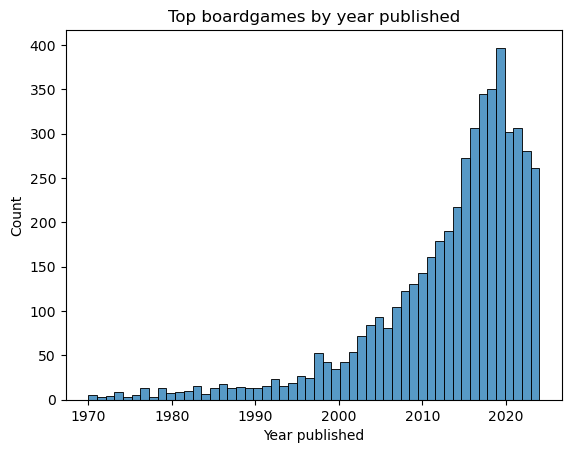

In [10]:
# Looking at the 'yearpublished' distribution.

# The year 1970 was chosen as the cutoff as only ~1.1% of these games were published before then
sns.histplot(data=df[df['yearpublished']>=1970]['yearpublished']) 

plt.title('Top boardgames by year published')
plt.xlabel('Year published');

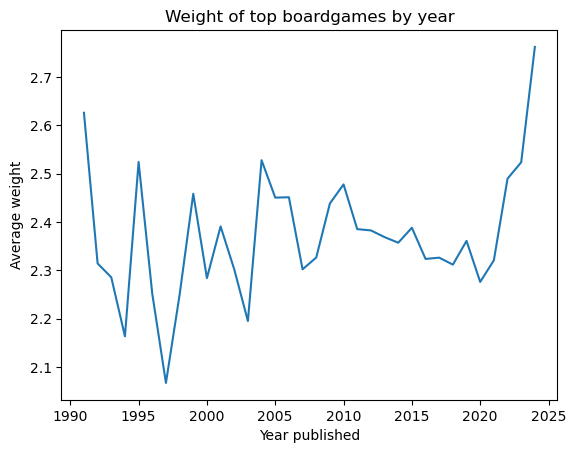

In [11]:
# Checking if there is a trend of boardgames getting heavier over time but only looking at the last three decades this time
sns.lineplot(df[df['yearpublished']>1990].groupby(df['yearpublished'])['weight'].mean())

plt.title('Weight of top boardgames by year')
plt.xlabel('Year published')
plt.ylabel('Average weight');

# It looks like from 2005 to 2020 the most popular boardgames were gradually getting lighter.
# But since 2020 there's been a dramatic shift towards heavier board games.

In [12]:
# Adding the columns for average playtime and average number of players

df['avgplaytime'] = (df['minplaytime']+df['maxplaytime'])/2
df['avgplayers'] = (df['minplayers']+df['maxplayers'])/2
df

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic,avgplaytime,avgplayers
0,224517,Brass: Birmingham,2018,1,8.41611,8.59849,45505,3.8809,2,4,60,120,14,"['Age of Reason', 'Economic', 'Industry / Manu...","['Hand Management', 'Income', 'Loans', 'Market...",90.0,3.0
1,161936,Pandemic Legacy: Season 1,2015,2,8.38079,8.52838,53369,2.8315,2,4,60,60,13,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",60.0,3.0
2,174430,Gloomhaven,2017,3,8.35418,8.59040,62022,3.9112,1,4,60,120,14,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Action Queue', 'Action Retrieval', 'Campaign...",90.0,2.5
3,342942,Ark Nova,2021,4,8.33397,8.53500,43007,3.7593,1,4,90,150,14,"['Animals', 'Economic', 'Environmental']","['Action Queue', 'End Game Bonuses', 'Hand Man...",120.0,2.5
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24169,8.60196,23644,4.3152,3,6,240,480,14,"['Civilization', 'Economic', 'Exploration', 'N...","['Action Drafting', 'Area-Impulse', 'Dice Roll...",360.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,249582,The Dark Summer: Normandy 1944,2021,4996,5.74559,7.88088,273,2.8667,1,2,480,480,0,"['Wargame', 'World War II']","['Chit-Pull System', 'Dice Rolling']",480.0,1.5
4993,963,The Gardens of the Alhambra,1993,4997,5.74555,6.15148,1370,1.7913,2,4,45,60,8,['Abstract Strategy'],"['Area Majority / Influence', 'Tile Placement']",52.5,3.0
4994,72644,Perplexus,2001,4998,5.74546,6.94747,442,1.5000,1,1,30,30,6,"['Action / Dexterity', 'Maze']",[],30.0,1.0
4995,97273,Upon a Salty Ocean,2011,4999,5.74544,6.47869,712,2.8971,2,4,120,120,13,"['Economic', 'Nautical', 'Renaissance']","['Action Points', 'Variable Phase Order']",120.0,3.0


<Axes: >

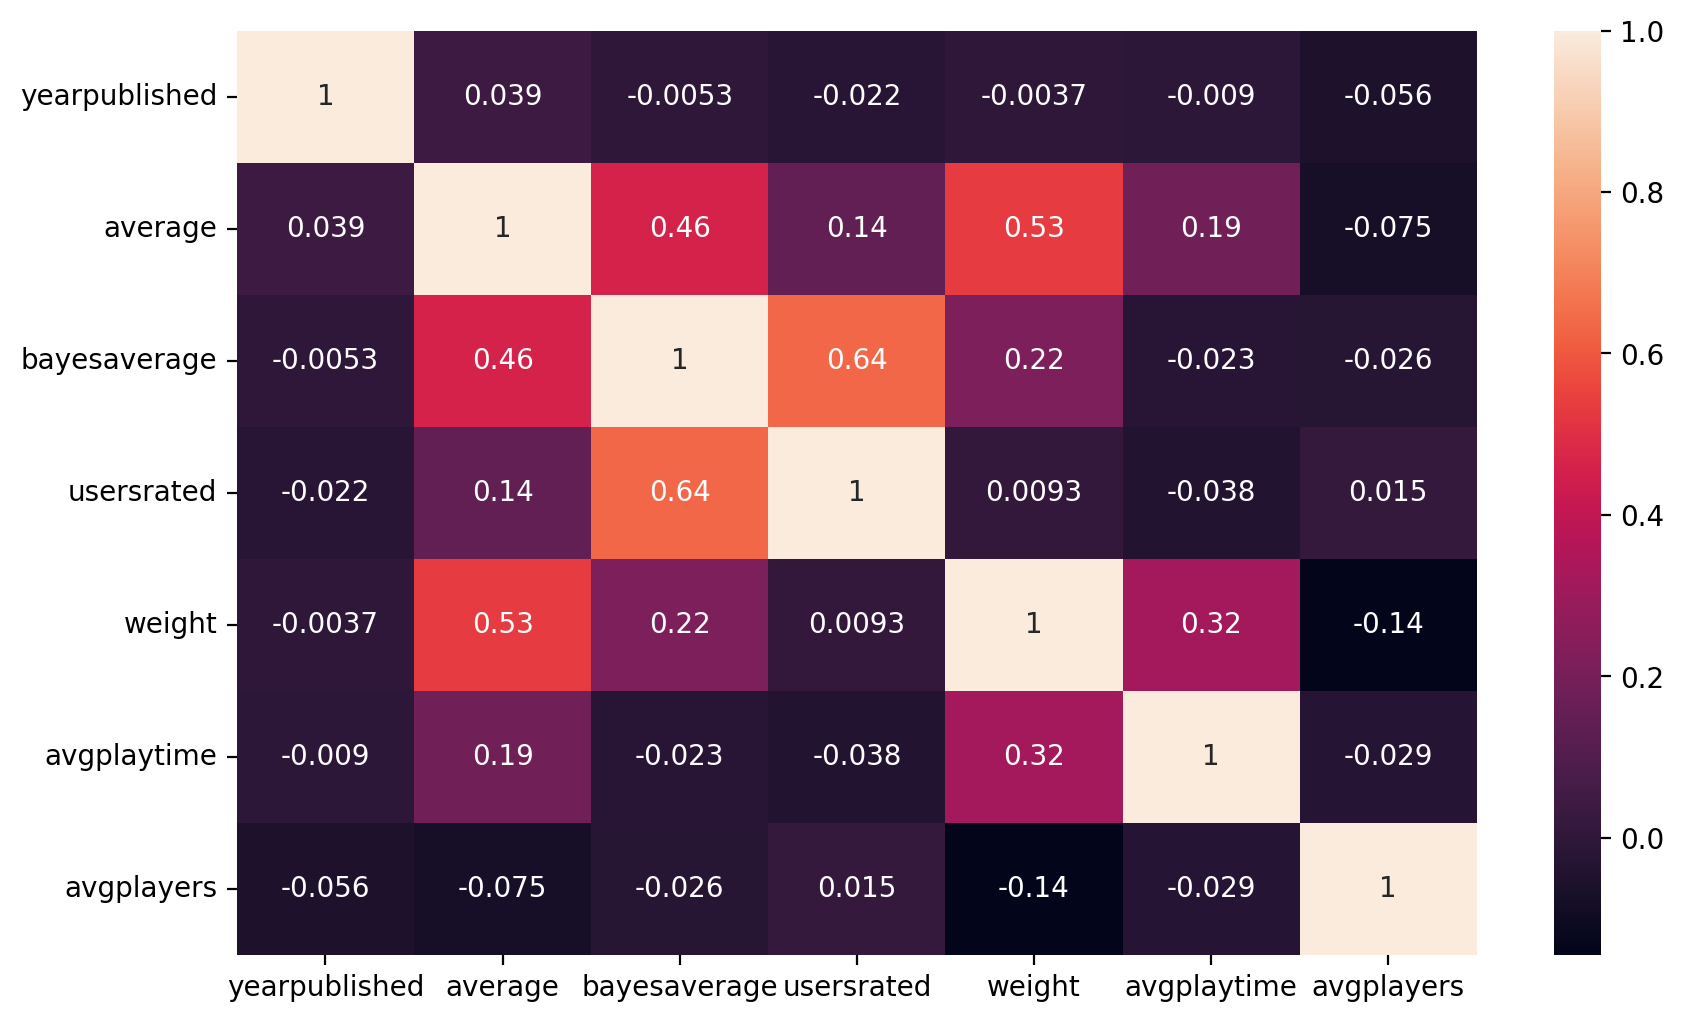

In [13]:
# Checking some of the feature correlations

plt.figure(figsize = (10,6), dpi=200)
sns.heatmap(df[['yearpublished', 'average', 'bayesaverage', 'usersrated', 'weight', 'avgplaytime', 'avgplayers']].corr(), annot=True)

In [14]:
# Cleaning up the strings in the 'category' and 'mechanic' columns

df['category'] = df['category'].apply(lambda x:x.replace("'","").replace("[","").replace("]",""))
df['mechanic'] = df['mechanic'].apply(lambda x:x.replace("'","").replace("[","").replace("]",""))

# Renaming the 'Deck, Bag, and Pool Building' mechanic into 'Deck / Bag / Pool Building' to get rid of commas
df['mechanic'] = df['mechanic'].apply(lambda x:x.replace("Deck, Bag, and Pool Building","Deck / Bag / Pool Building"))
df

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic,avgplaytime,avgplayers
0,224517,Brass: Birmingham,2018,1,8.41611,8.59849,45505,3.8809,2,4,60,120,14,"Age of Reason, Economic, Industry / Manufactur...","Hand Management, Income, Loans, Market, Networ...",90.0,3.0
1,161936,Pandemic Legacy: Season 1,2015,2,8.38079,8.52838,53369,2.8315,2,4,60,60,13,"Environmental, Medical","Action Points, Cooperative Game, Hand Manageme...",60.0,3.0
2,174430,Gloomhaven,2017,3,8.35418,8.59040,62022,3.9112,1,4,60,120,14,"Adventure, Exploration, Fantasy, Fighting, Min...","Action Queue, Action Retrieval, Campaign / Bat...",90.0,2.5
3,342942,Ark Nova,2021,4,8.33397,8.53500,43007,3.7593,1,4,90,150,14,"Animals, Economic, Environmental","Action Queue, End Game Bonuses, Hand Managemen...",120.0,2.5
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24169,8.60196,23644,4.3152,3,6,240,480,14,"Civilization, Economic, Exploration, Negotiati...","Action Drafting, Area-Impulse, Dice Rolling, F...",360.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,249582,The Dark Summer: Normandy 1944,2021,4996,5.74559,7.88088,273,2.8667,1,2,480,480,0,"Wargame, World War II","Chit-Pull System, Dice Rolling",480.0,1.5
4993,963,The Gardens of the Alhambra,1993,4997,5.74555,6.15148,1370,1.7913,2,4,45,60,8,Abstract Strategy,"Area Majority / Influence, Tile Placement",52.5,3.0
4994,72644,Perplexus,2001,4998,5.74546,6.94747,442,1.5000,1,1,30,30,6,"Action / Dexterity, Maze",,30.0,1.0
4995,97273,Upon a Salty Ocean,2011,4999,5.74544,6.47869,712,2.8971,2,4,120,120,13,"Economic, Nautical, Renaissance","Action Points, Variable Phase Order",120.0,3.0


In [15]:
# Creating lists of all categories and mechanics

categories = set([category for sublist in df['category'].apply(lambda x: x.split(', ')) for category in sublist])
categories = list(categories)

mechanics = set([mechanic for sublist in df['mechanic'].apply(lambda x: x.split(', ')) for mechanic in sublist])
mechanics = list(mechanics)

In [16]:
# Getting data for different categories and mechanics

cat_dict = {cat:[] for cat in categories}
mech_dict = {mech:[] for mech in mechanics}
col_names = ['num','avg','bayesavg','usersrated','weight','avgplaytime']

for category in categories:
    new_df1 = df[df['category'].str.contains(category)]
    cat_dict[category].extend([len(new_df1), new_df1['average'].mean(), new_df1['bayesaverage'].mean(), new_df1['usersrated'].mean(),
                              new_df1['weight'].mean(), new_df1['avgplaytime'].mean()])
    
for mechanic in mechanics:
    new_df2 = df[df['mechanic'].str.contains(mechanic)]
    mech_dict[mechanic].extend([len(new_df2), new_df2['average'].mean(), new_df2['bayesaverage'].mean(), new_df2['usersrated'].mean(),
                              new_df2['weight'].mean(), new_df2['avgplaytime'].mean()])

# The first item in each df is an empty string so we'll ignore those
top_cat_df = pd.DataFrame(cat_dict.values(), index = cat_dict.keys(), columns=col_names).sort_values(by='num', ascending=False)[1:]
top_mech_df = pd.DataFrame(mech_dict.values(), index = mech_dict.keys(), columns=col_names).sort_values(by='num', ascending=False)[1:]

# We'll also ignore the more obscure categories and mechanics that are represented by < 20 games
top_cat_df = top_cat_df[top_cat_df['num']>=20]
top_mech_df = top_mech_df[top_mech_df['num']>=20]

# Rounding the numbers
top_cat_df[['avg','bayesavg','weight','avgplaytime']] = top_cat_df[['avg','bayesavg','weight','avgplaytime']].round(2)
top_cat_df[['usersrated']] = top_cat_df[['usersrated']].round(0)
top_mech_df[['avg','bayesavg','weight','avgplaytime']] = top_mech_df[['avg','bayesavg','weight','avgplaytime']].round(2)
top_mech_df[['usersrated']] = top_mech_df[['usersrated']].round(0)

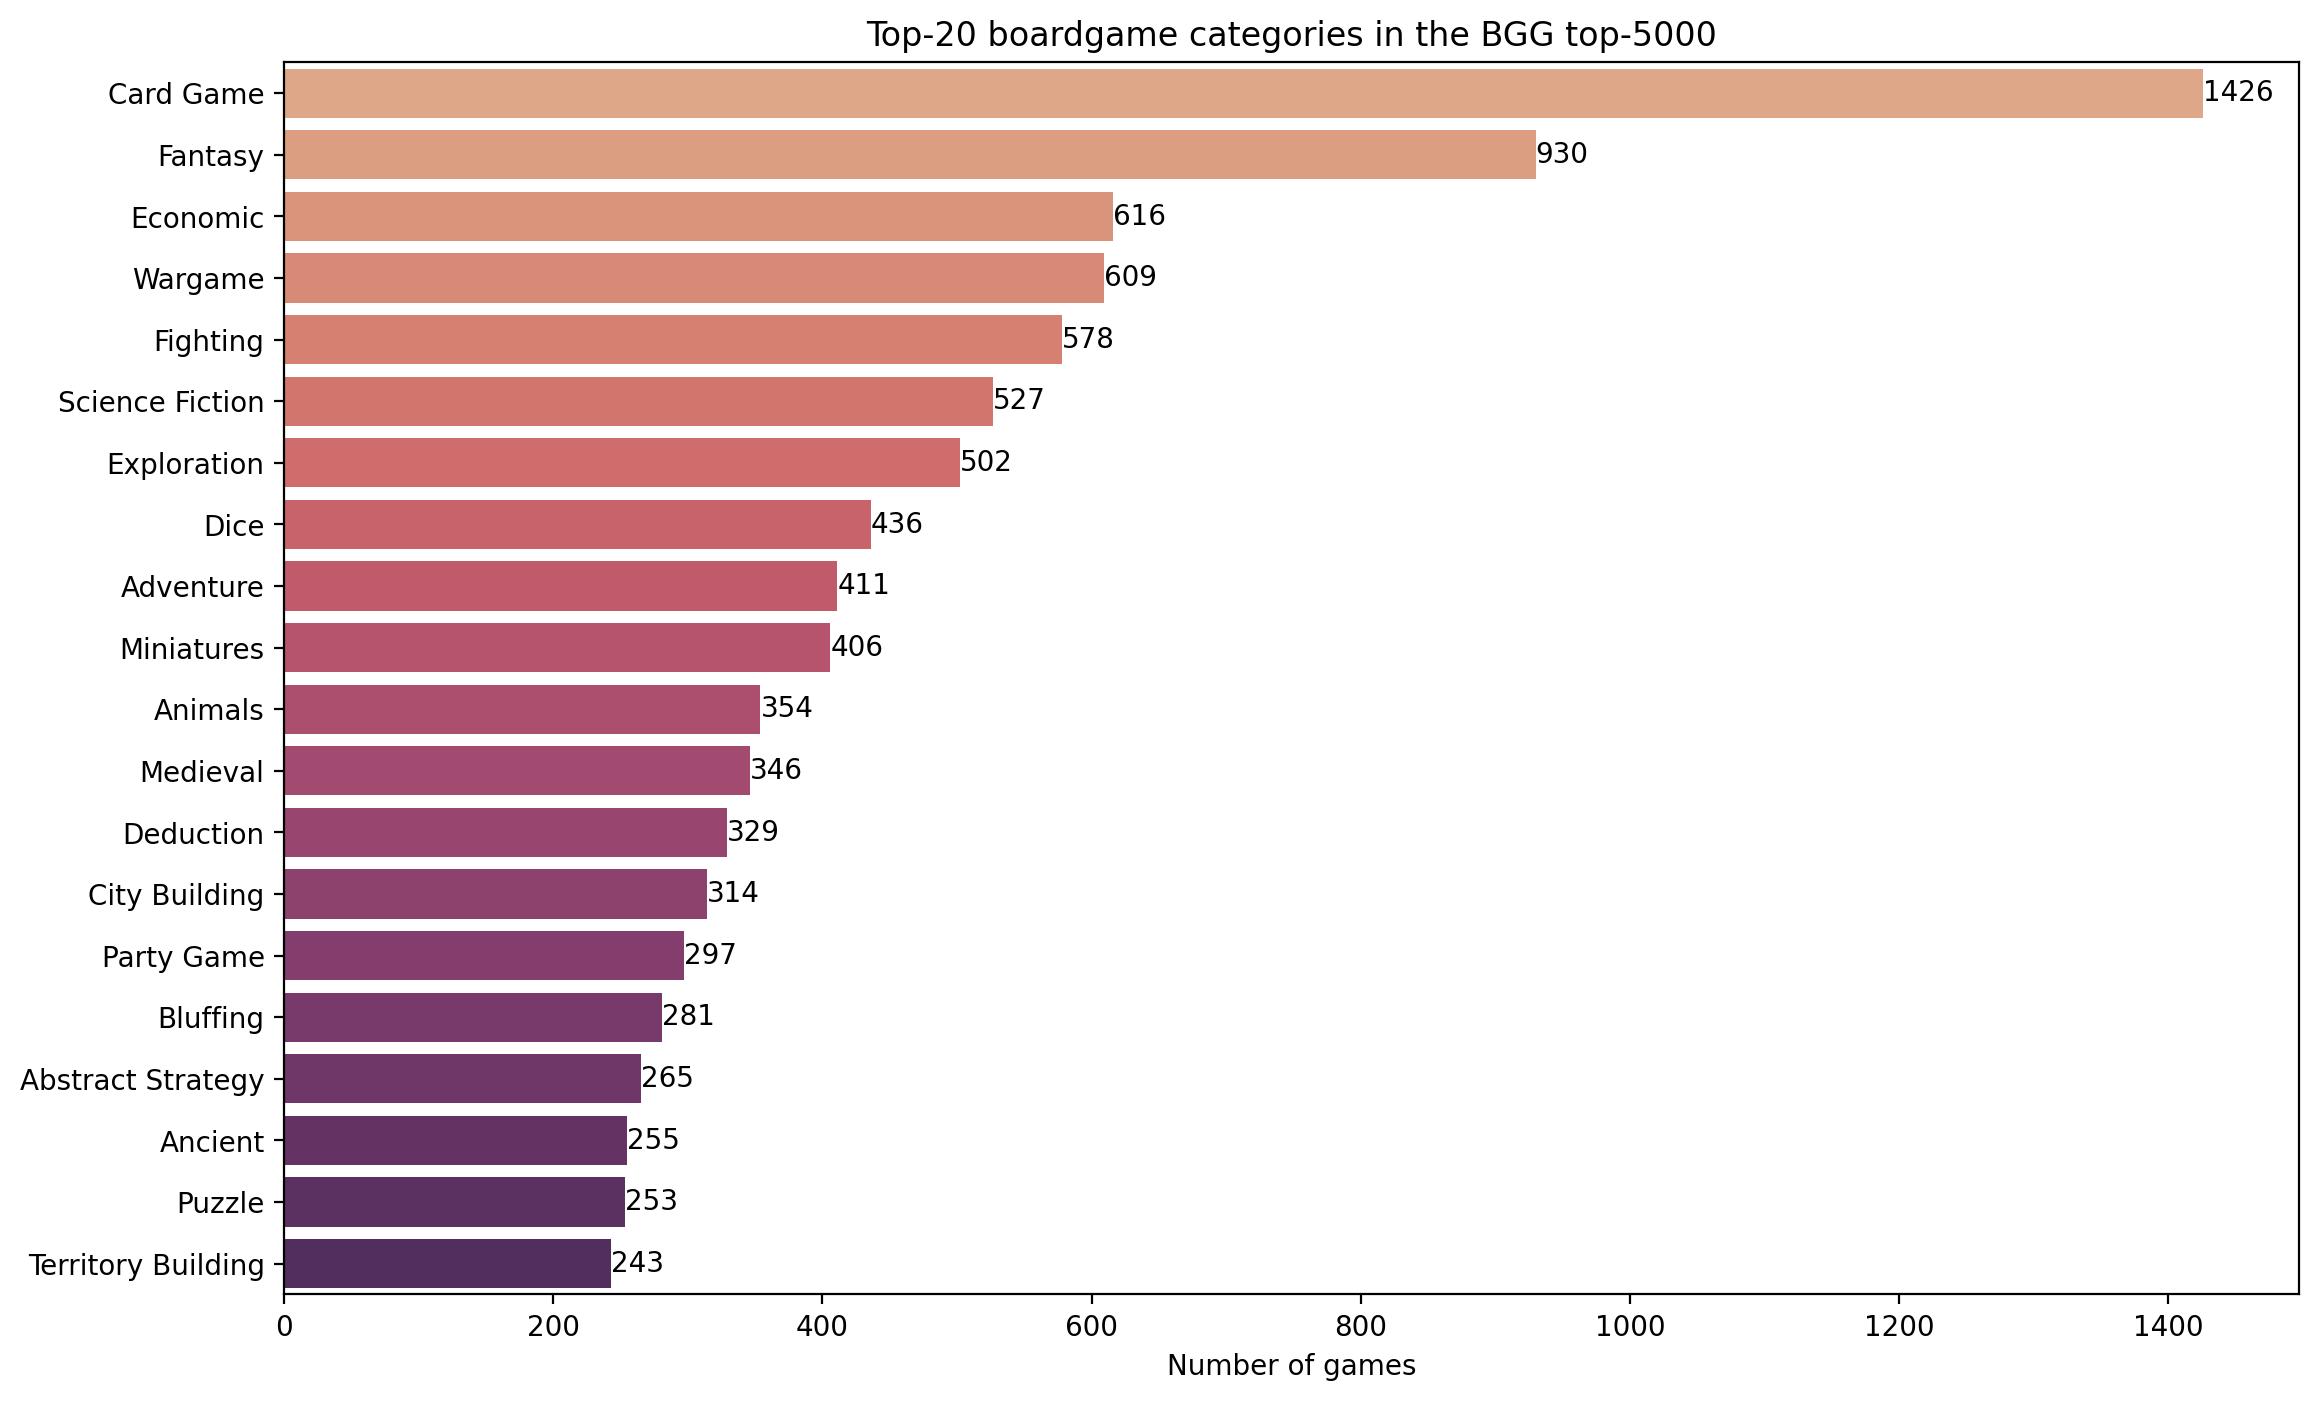

In [17]:
# Visualizing the top-20 categories by number of games

plt.figure(figsize = (13,8), dpi=200)
ax = sns.barplot(data=top_cat_df[:20], y = top_cat_df.index[:20], x='num', palette='flare')
ax.bar_label(ax.containers[0])

plt.title('Top-20 boardgame categories in the BGG top-5000')
plt.xlabel('Number of games');

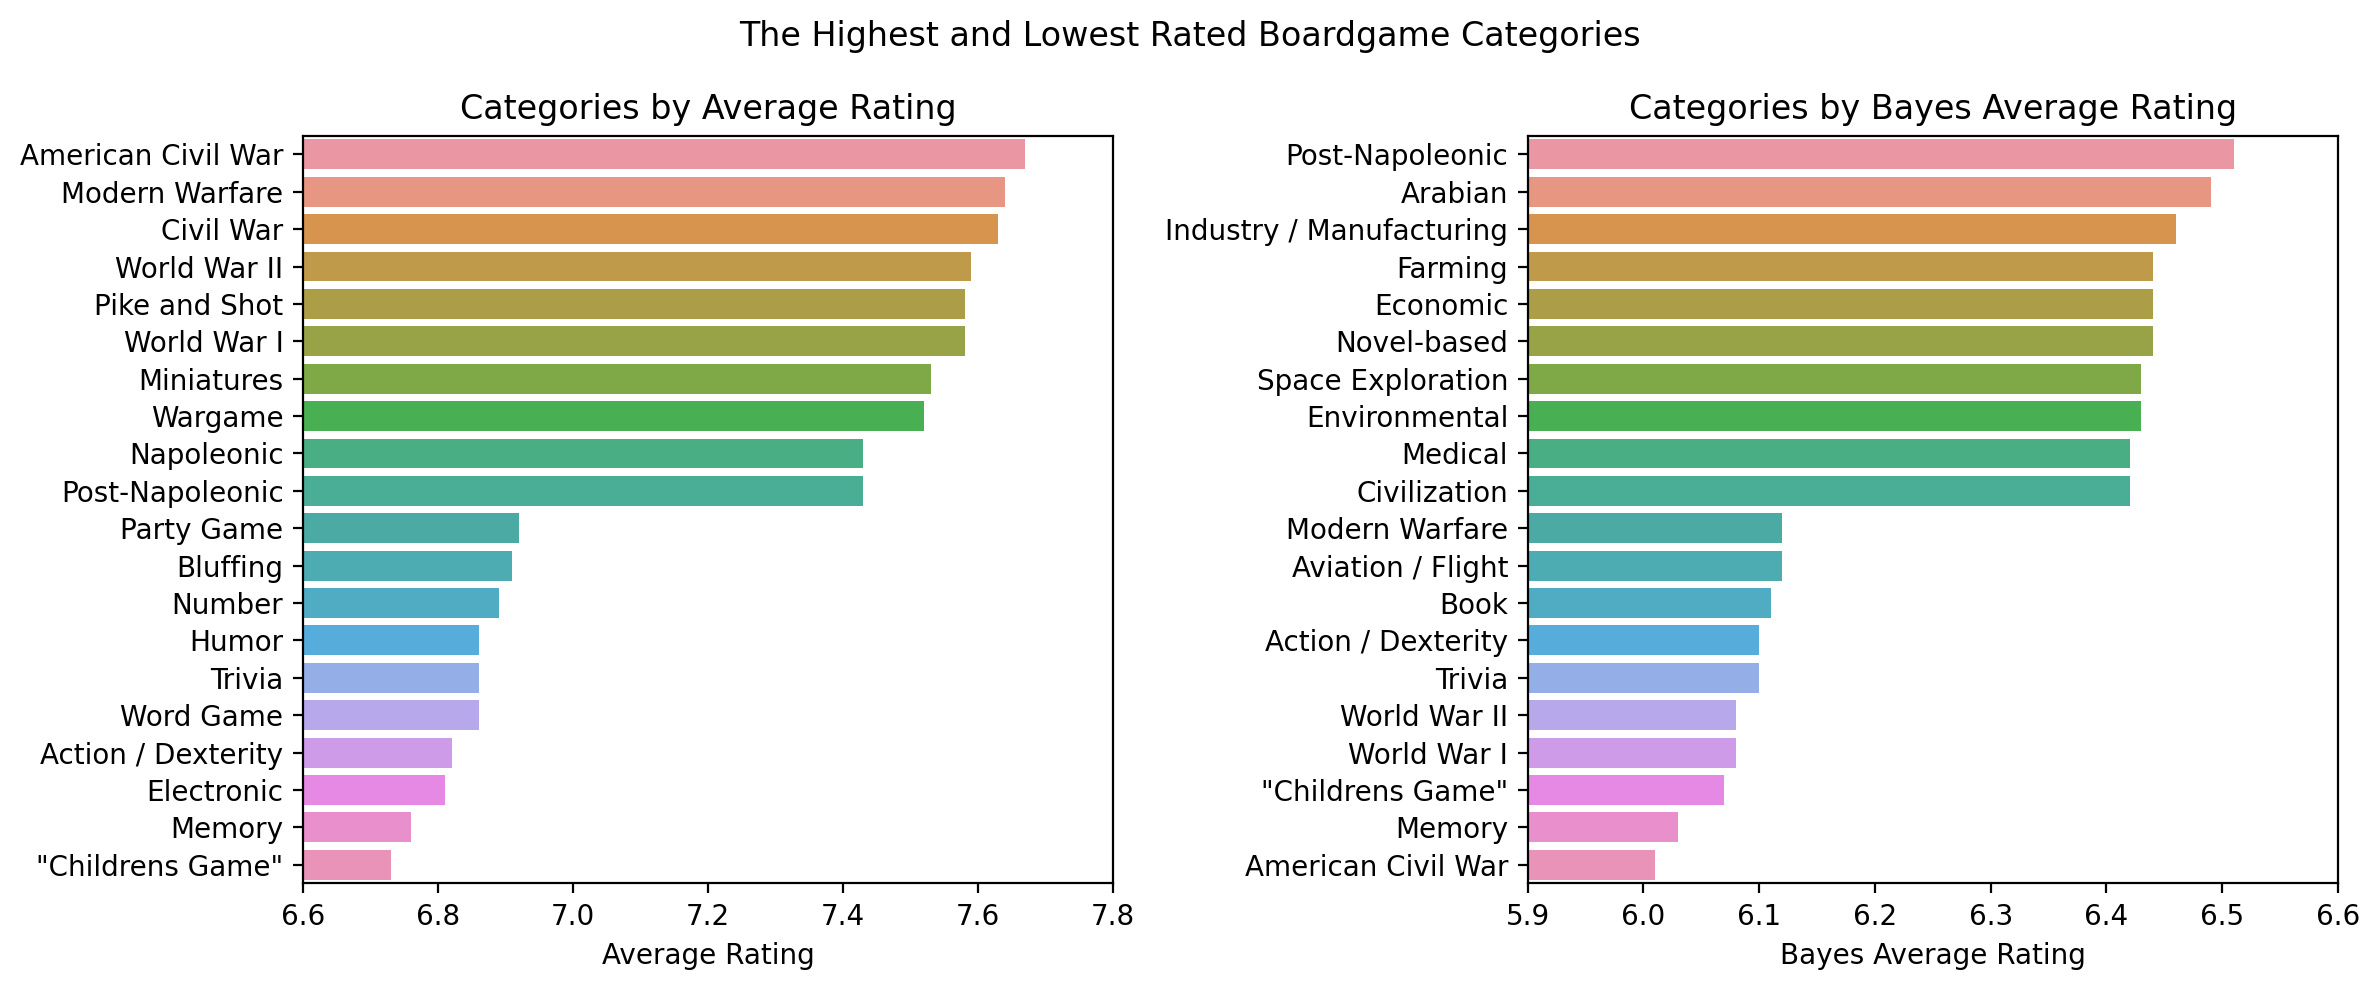

In [18]:
# Visualising the 10 highest and lowest rated categories

top_cat_df1 = top_cat_df.sort_values(by='avg', ascending = False)
best_worst_cat1 = pd.concat([top_cat_df1.head(10), top_cat_df1.tail(10)]) # Top-10 and bottom-10 boardgames by avg
top_cat_df2 = top_cat_df.sort_values(by='bayesavg', ascending = False)
best_worst_cat2 = pd.concat([top_cat_df2.head(10), top_cat_df2.tail(10)]) # Top-10 and bottom-10 boardgames by bayesavg

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi = 200)
sns.barplot(ax=axes[0], data=best_worst_cat1, y = best_worst_cat1.index, x='avg')
sns.barplot(ax=axes[1], data=best_worst_cat2, y = best_worst_cat2.index, x='bayesavg')

axes[0].set_title('Categories by Average Rating')
axes[0].set_xlim(6.6,7.8)
axes[0].set_xlabel('Average Rating')

axes[1].set_title('Categories by Bayes Average Rating')
axes[1].set_xlim(5.9,6.6)
axes[1].set_xlabel('Bayes Average Rating')

fig.suptitle('The Highest and Lowest Rated Boardgame Categories')
plt.tight_layout()

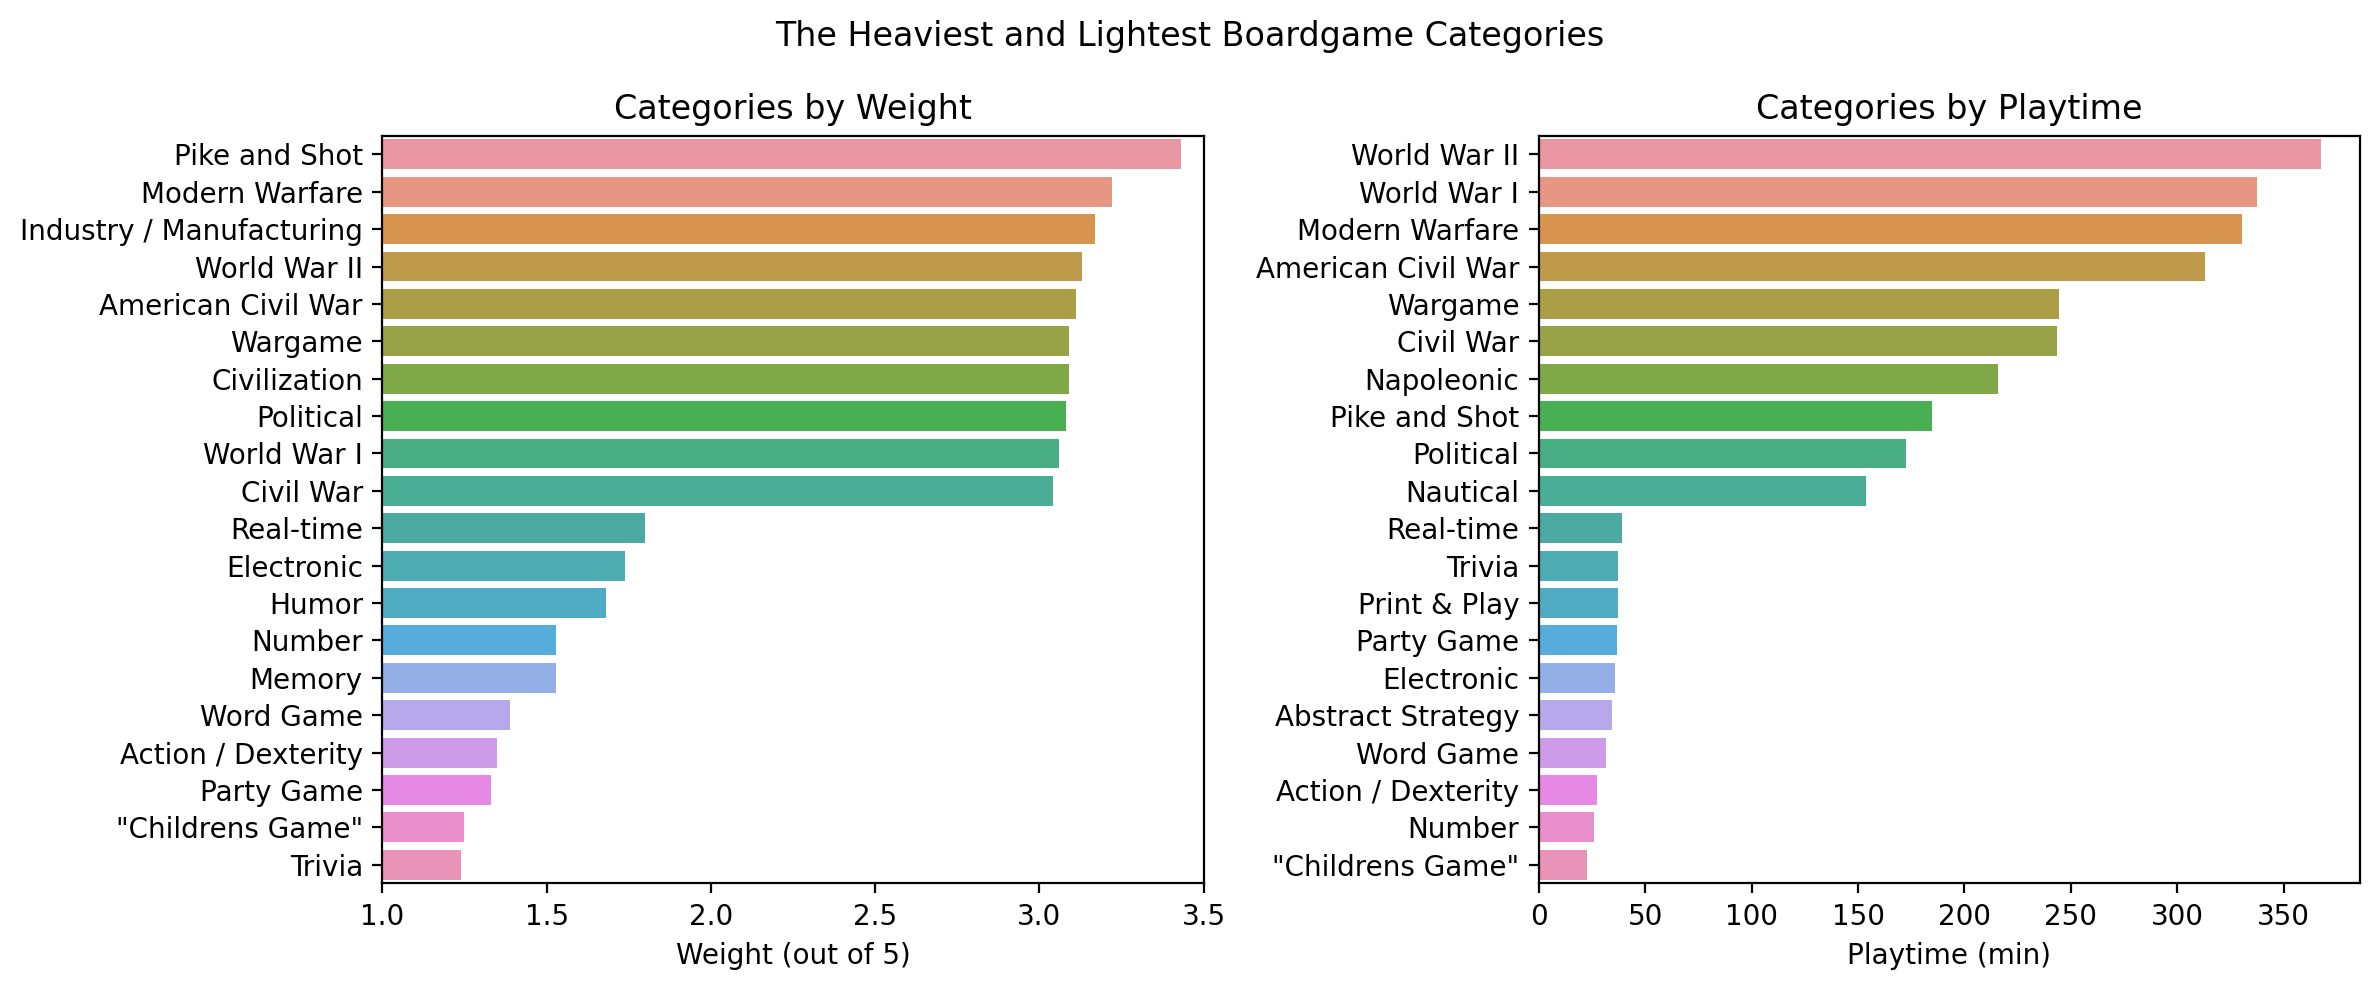

In [19]:
# Visualising the 10 heaviest and lightest categories + categories with the longest and shortest playtime

top_cat_df3 = top_cat_df.sort_values(by='weight', ascending = False)
best_worst_cat3 = pd.concat([top_cat_df3.head(10), top_cat_df3.tail(10)]) # Top-10 and bottom-10 boardgames by weight
top_cat_df4 = top_cat_df.sort_values(by='avgplaytime', ascending = False)
best_worst_cat4 = pd.concat([top_cat_df4.head(10), top_cat_df4.tail(10)]) # Top-10 and bottom-10 boardgames by avgplaytime

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi = 200)
sns.barplot(ax=axes[0], data=best_worst_cat3, y = best_worst_cat3.index, x='weight')
sns.barplot(ax=axes[1], data=best_worst_cat4, y = best_worst_cat4.index, x='avgplaytime')

axes[0].set_title('Categories by Weight')
axes[0].set_xlim(1,3.5)
axes[0].set_xlabel('Weight (out of 5)')

axes[1].set_title('Categories by Playtime')
axes[1].set_xlabel('Playtime (min)')

fig.suptitle('The Heaviest and Lightest Boardgame Categories')
plt.tight_layout()

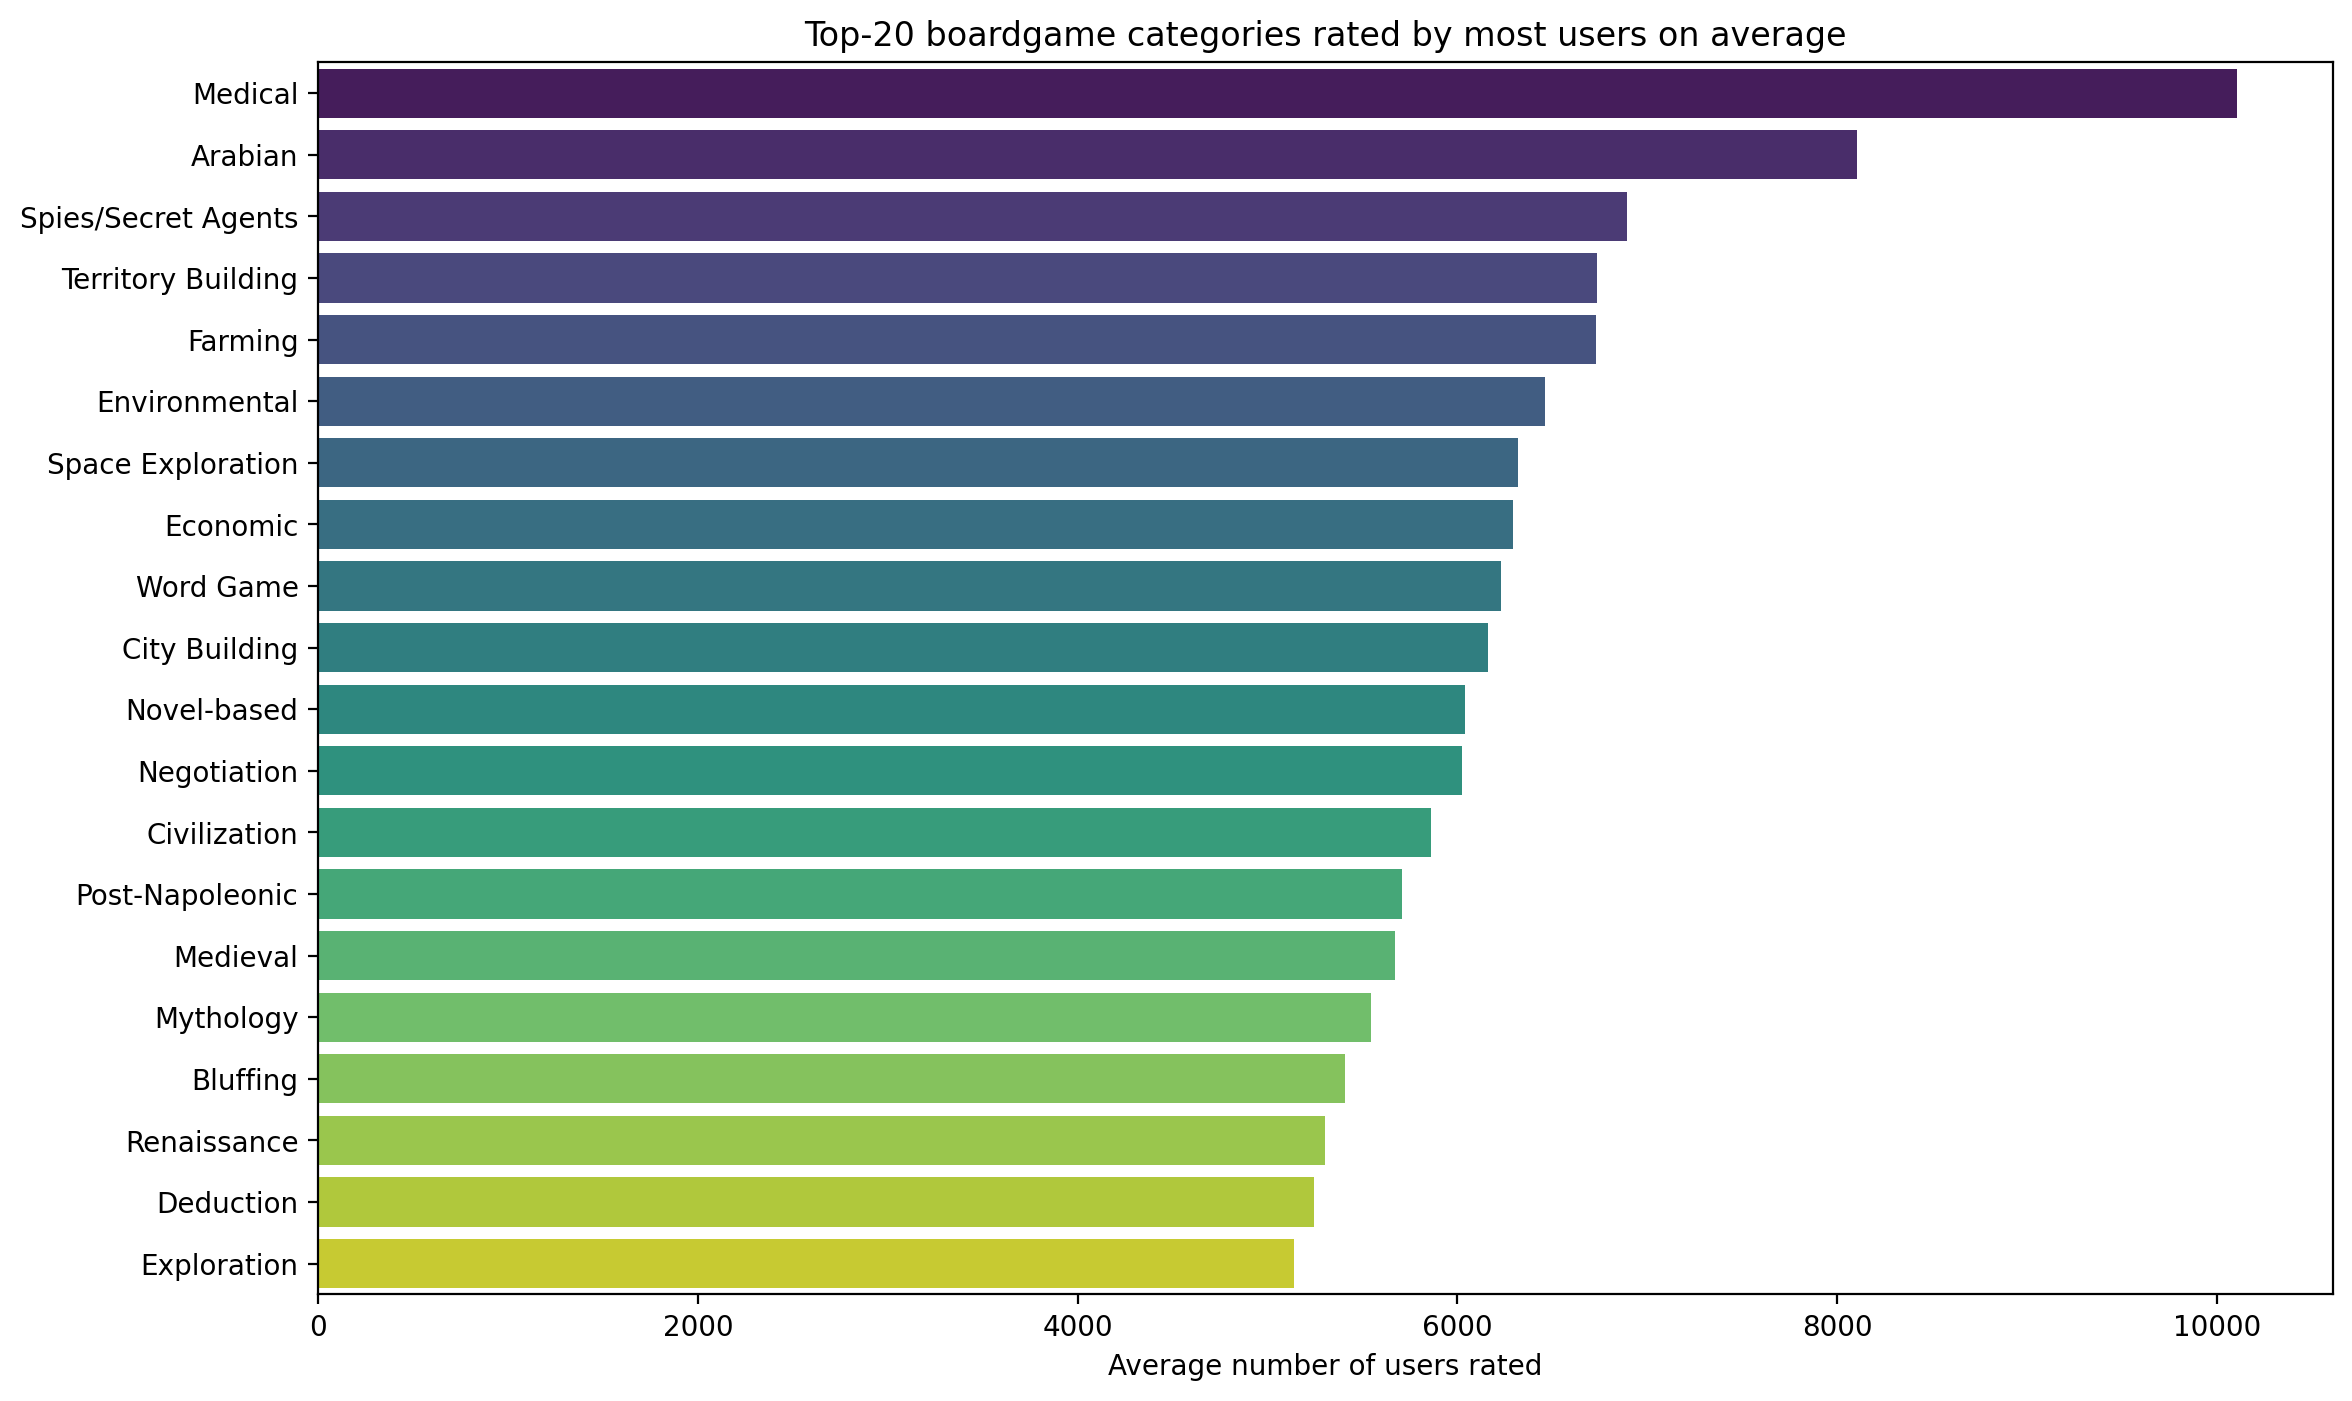

In [20]:
# Finally, visualizing the top-20 categories rated by the highest number of users on average

plt.figure(figsize = (13,8), dpi=200)
users_cat_df = top_cat_df.sort_values(by='usersrated', ascending=False)
sns.barplot(data=users_cat_df[:20], y = users_cat_df[:20].index, x='usersrated', palette='viridis')

plt.title('Top-20 boardgame categories rated by most users on average')
plt.xlabel('Average number of users rated');

In [21]:
# It's curious that 'Medical' and 'Arabian' end up that high on the list.
# Checking what the most popular games in these categories are

print(f"Number of 'Medical' games: {len(df[df['category'].str.contains('Medical')])}")
print(f"Number of 'Arabian' games: {len(df[df['category'].str.contains('Arabian')])}")

df[df['category'].str.contains('Medical') | df['category'].str.contains('Arabian')].sort_values(by='usersrated', 
                                                                                                ascending=False)[['name','usersrated','category']]

# It looks like there are only 26 games in the 'Medical' category and 20 games in the 'Arabian' category, and there are 
# a couple extremely popular games in each category that affect the overall average number.

Number of 'Medical' games: 26
Number of 'Arabian' games: 20


,name,usersrated,category
146,Pandemic,125336,Medical
1,Pandemic Legacy: Season 1,53369,"Environmental, Medical"
78,Five Tribes: The Djinns of Naqala,41386,"Arabian, Fantasy, Mythology"
579,Camel Up,27156,"Animals, Arabian, Dice, Racing"
148,Targi,23578,"Arabian, Card Game"
54,Pandemic Legacy: Season 2,16850,"Environmental, Exploration, Medical, Science F..."
591,Through the Desert,14100,"Abstract Strategy, Animals, Arabian"
260,Camel Up (Second Edition),12729,"Animals, Arabian, Dice, Racing"
610,Tales of the Arabian Nights,12702,"Adventure, Arabian, Exploration, Fantasy, Travel"
136,Iberia,10774,"Medical, Post-Napoleonic, Trains"


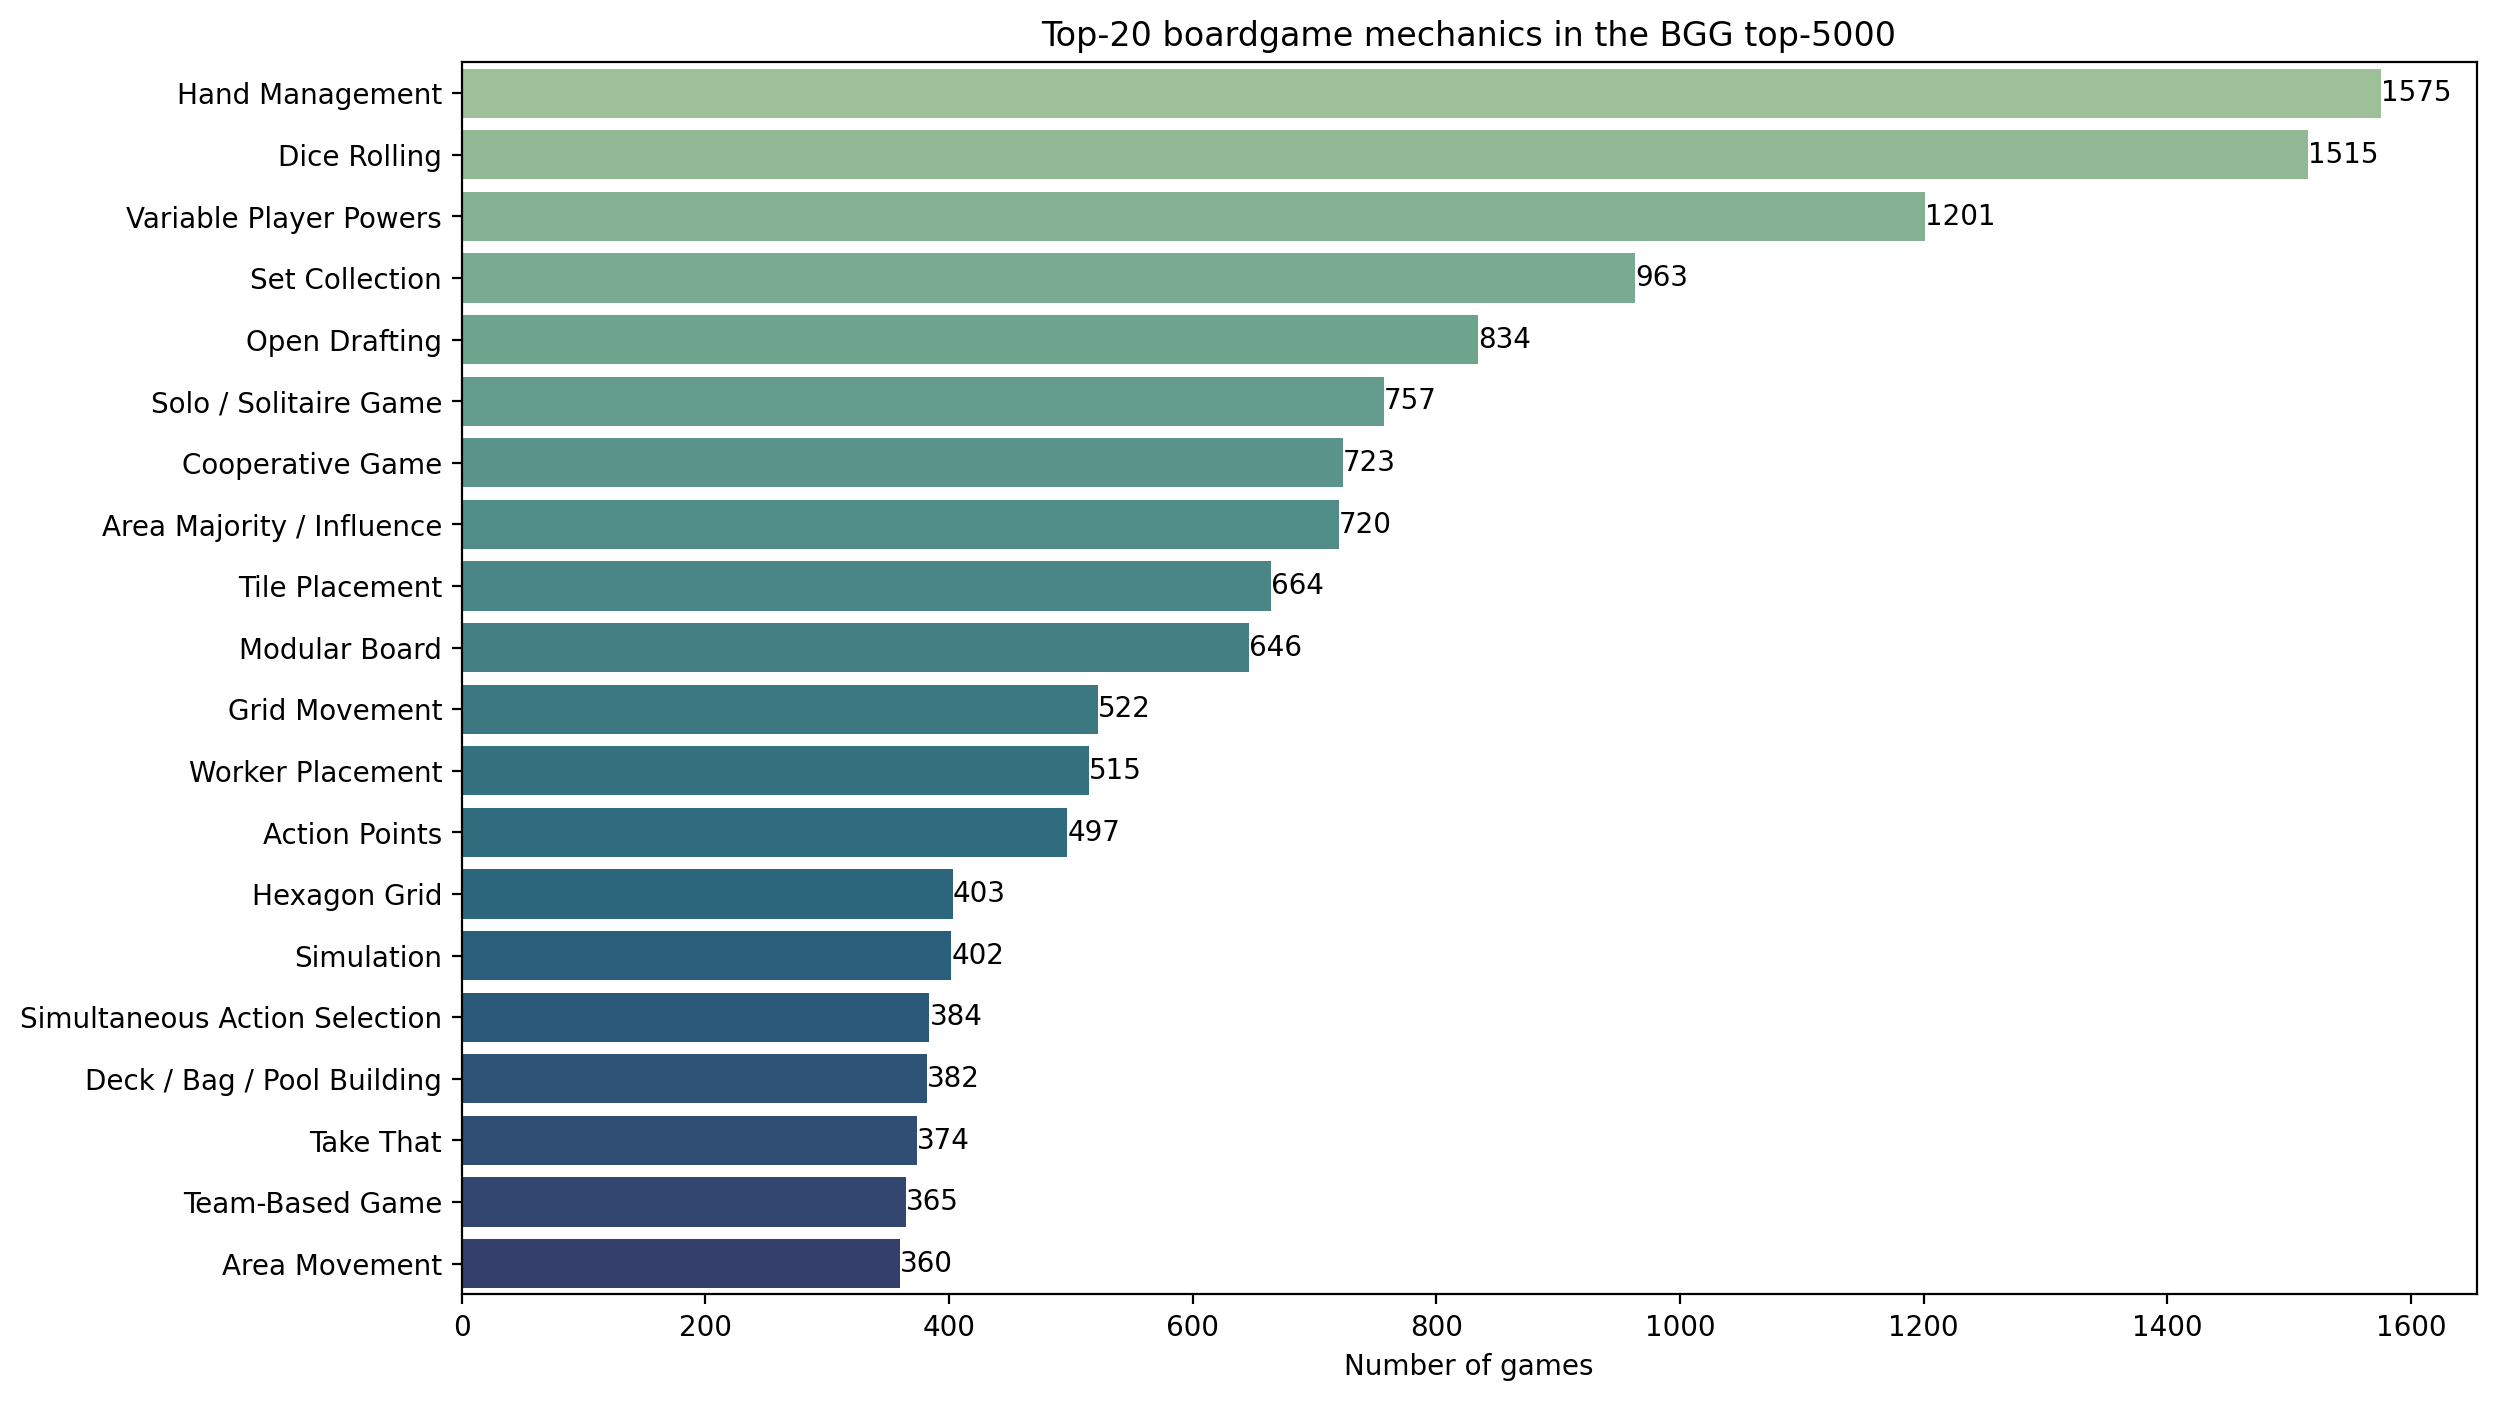

In [22]:
# Next, visualizing the top-20 mechanics by number of games

plt.figure(figsize = (13,8), dpi=200)
ax = sns.barplot(data=top_mech_df[:20], y = top_mech_df.index[:20], x='num', palette='crest')
ax.bar_label(ax.containers[0])

plt.title('Top-20 boardgame mechanics in the BGG top-5000')
plt.xlabel('Number of games');

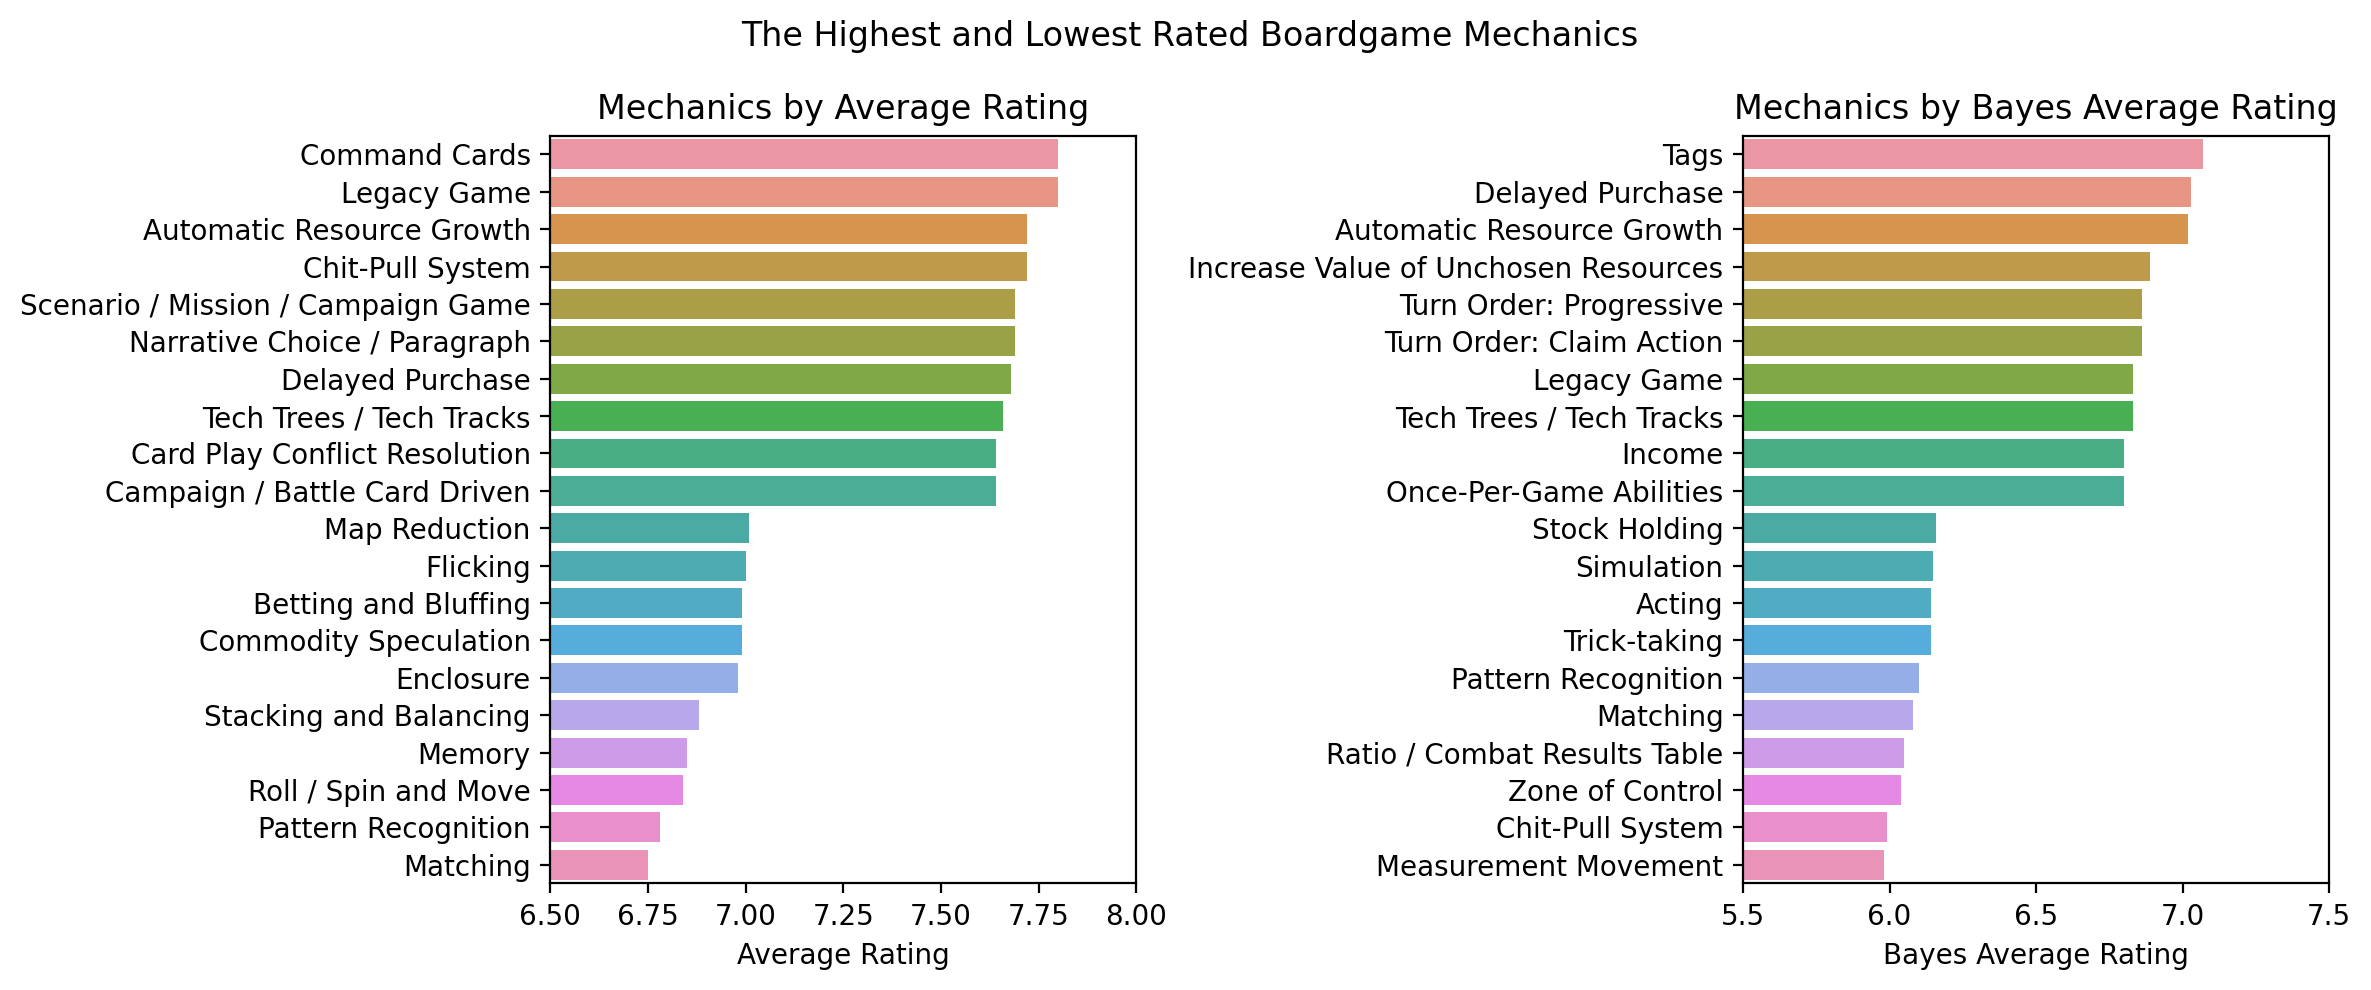

In [23]:
# Visualising the 10 highest and lowest rated mechanics

top_mech_df1 = top_mech_df.sort_values(by='avg', ascending = False)
best_worst_mech1 = pd.concat([top_mech_df1.head(10), top_mech_df1.tail(10)]) # Top-10 and bottom-10 boardgames by avg
top_mech_df2 = top_mech_df.sort_values(by='bayesavg', ascending = False)
best_worst_mech2 = pd.concat([top_mech_df2.head(10), top_mech_df2.tail(10)]) # Top-10 and bottom-10 boardgames by bayesavg

fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi = 200)
sns.barplot(ax=axes[0], data=best_worst_mech1, y = best_worst_mech1.index, x='avg')
sns.barplot(ax=axes[1], data=best_worst_mech2, y = best_worst_mech2.index, x='bayesavg')

axes[0].set_title('Mechanics by Average Rating')
axes[0].set_xlim(6.5,8)
axes[0].set_xlabel('Average Rating')

axes[1].set_title('Mechanics by Bayes Average Rating')
axes[1].set_xlim(5.5,7.5)
axes[1].set_xlabel('Bayes Average Rating')

fig.suptitle('The Highest and Lowest Rated Boardgame Mechanics')
plt.tight_layout()

In [24]:
top_mech_df.sort_values(by='usersrated', ascending = False).head(10)

,num,avg,bayesavg,usersrated,weight,avgplaytime
Tags,49,7.54,7.07,23187.0,2.75,73.98
Increase Value of Unchosen Resources,50,7.54,6.89,15226.0,2.80,78.65
Automatic Resource Growth,21,7.72,7.02,14906.0,3.11,75.48
Turn Order: Progressive,76,7.39,6.86,14798.0,2.68,69.14
Delayed Purchase,41,7.68,7.03,14749.0,2.80,145.37
Once-Per-Game Abilities,45,7.51,6.80,14298.0,2.64,67.89
Income,142,7.52,6.80,12446.0,3.00,89.17
Hidden Victory Points,42,7.41,6.65,12039.0,2.58,68.15
Score-and-Reset Game,34,7.11,6.59,11759.0,1.72,32.46
Turn Order: Claim Action,68,7.53,6.86,11493.0,3.01,78.46


In [46]:
def get_decade(year):
    if year < 1980:
        return 'pre-1980'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'

In [47]:
df['decade'] = df['yearpublished'].apply(get_decade)
df

,id,name,yearpublished,rank,bayesaverage,average,usersrated,weight,minplayers,maxplayers,minplaytime,maxplaytime,age,category,mechanic,avgplaytime,avgplayers,decade
0,224517,Brass: Birmingham,2018,1,8.41611,8.59849,45505,3.8809,2,4,60,120,14,"Age of Reason, Economic, Industry / Manufactur...","Hand Management, Income, Loans, Market, Networ...",90.0,3.0,2010s
1,161936,Pandemic Legacy: Season 1,2015,2,8.38079,8.52838,53369,2.8315,2,4,60,60,13,"Environmental, Medical","Action Points, Cooperative Game, Hand Manageme...",60.0,3.0,2010s
2,174430,Gloomhaven,2017,3,8.35418,8.59040,62022,3.9112,1,4,60,120,14,"Adventure, Exploration, Fantasy, Fighting, Min...","Action Queue, Action Retrieval, Campaign / Bat...",90.0,2.5,2010s
3,342942,Ark Nova,2021,4,8.33397,8.53500,43007,3.7593,1,4,90,150,14,"Animals, Economic, Environmental","Action Queue, End Game Bonuses, Hand Managemen...",120.0,2.5,2020s
4,233078,Twilight Imperium: Fourth Edition,2017,5,8.24169,8.60196,23644,4.3152,3,6,240,480,14,"Civilization, Economic, Exploration, Negotiati...","Action Drafting, Area-Impulse, Dice Rolling, F...",360.0,4.5,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,249582,The Dark Summer: Normandy 1944,2021,4996,5.74559,7.88088,273,2.8667,1,2,480,480,0,"Wargame, World War II","Chit-Pull System, Dice Rolling",480.0,1.5,2020s
4993,963,The Gardens of the Alhambra,1993,4997,5.74555,6.15148,1370,1.7913,2,4,45,60,8,Abstract Strategy,"Area Majority / Influence, Tile Placement",52.5,3.0,1990s
4994,72644,Perplexus,2001,4998,5.74546,6.94747,442,1.5000,1,1,30,30,6,"Action / Dexterity, Maze",,30.0,1.0,2000s
4995,97273,Upon a Salty Ocean,2011,4999,5.74544,6.47869,712,2.8971,2,4,120,120,13,"Economic, Nautical, Renaissance","Action Points, Variable Phase Order",120.0,3.0,2010s


In [48]:
df['decade'].value_counts()

2010s       2562
2020s       1151
2000s        820
1990s        232
1980s        119
pre-1980     113
Name: decade, dtype: int64

In [37]:
cat_2010 = [category for sublist in df[df['decade']=='2010s']['category'].apply(lambda x: x.split(', ')) for category in sublist]
cat_2010

['Age of Reason',
 'Economic',
 'Industry / Manufacturing',
 'Post-Napoleonic',
 'Trains',
 'Transportation',
 'Environmental',
 'Medical',
 'Adventure',
 'Exploration',
 'Fantasy',
 'Fighting',
 'Miniatures',
 'Civilization',
 'Economic',
 'Exploration',
 'Negotiation',
 'Political',
 'Science Fiction',
 'Space Exploration',
 'Wargame',
 'Economic',
 'Environmental',
 'Industry / Manufacturing',
 'Science Fiction',
 'Space Exploration',
 'Territory Building',
 'Fantasy',
 'Fighting',
 'Miniatures',
 'Novel-based',
 'Territory Building',
 'Wargame',
 'Civil War',
 'Miniatures',
 'Movies / TV / Radio theme',
 'Science Fiction',
 'Space Exploration',
 'Wargame',
 'Environmental',
 'Fantasy',
 'Fighting',
 'Mythology',
 'Territory Building',
 'Civilization',
 'Economic',
 'Miniatures',
 'Science Fiction',
 'Space Exploration',
 'Territory Building',
 'Card Game',
 'Civilization',
 'Economic',
 'American West',
 'Animals',
 'Economic',
 'Dice',
 'Medieval',
 'Territory Building',
 'Economi

In [49]:
from collections import Counter
Counter(cat_2010).most_common(10)

[('Card Game', 844),
 ('Fantasy', 535),
 ('Fighting', 333),
 ('Economic', 331),
 ('Science Fiction', 301),
 ('Dice', 259),
 ('Wargame', 258),
 ('Miniatures', 227),
 ('Adventure', 212),
 ('Exploration', 210)]

In [57]:
count_df = pd.DataFrame(Counter(cat_2010).most_common(10), columns=['Category', 'Count'])
count_df['Percentage'] = (100*count_df['Count']/len(cat_2010)).round(2)
count_df

,Category,Count,Percentage
0,Card Game,844,10.96
1,Fantasy,535,6.95
2,Fighting,333,4.32
3,Economic,331,4.30
4,Science Fiction,301,3.91
5,Dice,259,3.36
6,Wargame,258,3.35
7,Miniatures,227,2.95
8,Adventure,212,2.75
9,Exploration,210,2.73


<Axes: xlabel='Percentage', ylabel='Category'>

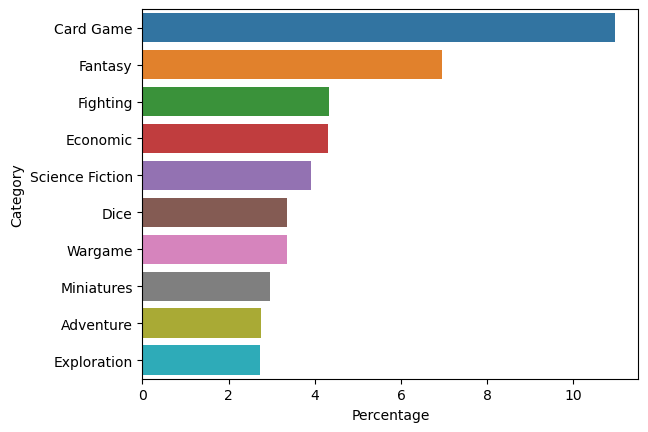

In [59]:
sns.barplot(data = count_df, x = 'Percentage', y = 'Category')

In [45]:
cat_pre_1970 = [category for sublist in df[df['decade']=='pre-1970']['category'].apply(lambda x: x.split(', ')) for category in sublist]
Counter(cat_pre_1970).most_common(10)

[('Card Game', 22),
 ('Abstract Strategy', 17),
 ('Sports', 6),
 ('Action / Dexterity', 5),
 ('Bluffing', 4),
 ('Wargame', 4),
 ('Party Game', 3),
 ('Memory', 3),
 ('Economic', 2),
 ('Negotiation', 2)]

In [43]:
len(cat_2000)

2354